In [83]:
import re
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import scipy.signal as signal
from scipy.io import savemat
import zipfile
from google.colab import files

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
def parse_data_to_columns(file_path):
    pattern = re.compile(r'data\s*=\s*\[([^\]]+)\]')
    data_lists = []

    with open(file_path, 'r', encoding = 'cp1251') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                data_str = match.group(1)
                try:
                    numbers = [float(x.strip()) for x in data_str.split(',') if x.strip()]
                    data_lists.append(numbers)
                except ValueError:
                    continue

    if not data_lists:
        return pd.DataFrame()

    first_col_length = len(data_lists[0])

    columns = {}
    for idx, data in enumerate(data_lists, start=1):
        col_name = f"column {idx}"
        if len(data) < first_col_length:
            padded_data = data + [float('nan')] * (first_col_length - len(data))
        else:
            padded_data = data[:first_col_length]
        columns[col_name] = padded_data

    return pd.DataFrame(columns)

In [85]:
folder_path = '/content/drive/MyDrive/dataset/PD'
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.txt')]
file_paths.sort()

df_list = []

for i, path in enumerate(file_paths):
    try:
        df_file = parse_data_to_columns(path)

        if df_file is not None:
            df_list.append(df_file)
        else:
            print(f"Не удалось обработать файл {i+1}")

    except Exception as e:
        print(f"Ошибка при обработке файла {path}: {str(e)}")

In [86]:
column_names = [
        'EOG_left_h',
        'EOG_right_h',
        'EOG_left_v',
        'EOG_right_v',
        'head_horizontal',
        'head_frontal',
        'head_sagittal',
        'Сигнал_8',
        'Сигнал_9',
        'Сигнал_10',
        'Сигнал_11'
    ]

for df in df_list:
    df.columns = column_names

for df in df_list:
    #df.drop(df.columns[[7, 8, 9, 10]], axis=1, inplace=True)
    df.insert(0, 'time', range(len(df)))

In [87]:
#Scaling
"""target_columns = ['EOG_left_h', 'EOG_right_h', 'EOG_left_v', 'EOG_right_v']

for i in range(len(df_list)):
  for col in target_columns:
      data = df_list[i][col].copy()

      shifted = data - data.iloc[i]
      max_abs = shifted.abs().max()

      if max_abs != 0:
          df_list[i][col] = shifted / max_abs
      else:
          # Если все значения после сдвига нулевые, оставляем без изменений
          df_list[i][col] = shifted"""

"target_columns = ['EOG_left_h', 'EOG_right_h', 'EOG_left_v', 'EOG_right_v']\n\nfor i in range(len(df_list)):\n  for col in target_columns:\n      # Извлекаем данные столбца\n      data = df_list[i][col].copy()\n\n      # Вычитаем начальное значение (нормировка на ноль в момент времени 0)\n      shifted = data - data.iloc[i]\n\n      # Находим максимальное абсолютное значение после сдвига\n      max_abs = shifted.abs().max()\n\n      # Масштабируем данные, если max_abs не ноль\n      if max_abs != 0:\n          df_list[i][col] = shifted / max_abs\n      else:\n          # Если все значения после сдвига нулевые, оставляем без изменений\n          df_list[i][col] = shifted"

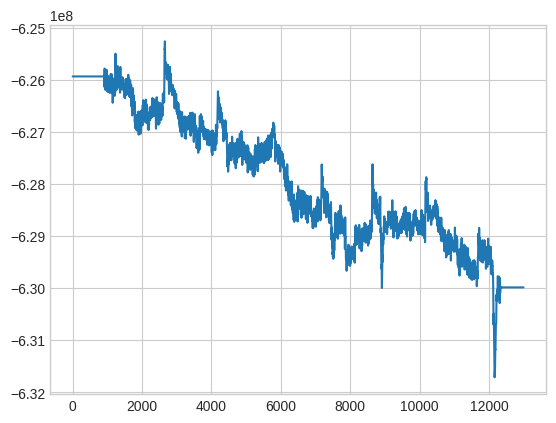

In [88]:
plt.plot(df_list[13]['EOG_left_h'])

# Parkinson Disease

In [89]:
def parse_data_to_columns(file_path):
    pattern = re.compile(r'data\s*=\s*\[([^\]]+)\]')
    data_lists = []

    with open(file_path, 'r', encoding = 'cp1251') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                data_str = match.group(1)
                try:
                    numbers = [float(x.strip()) for x in data_str.split(',') if x.strip()]
                    data_lists.append(numbers)
                except ValueError:
                    continue

    if not data_lists:
        return pd.DataFrame()

    first_col_length = len(data_lists[0])

    columns = {}
    for idx, data in enumerate(data_lists, start=1):
        col_name = f"column {idx}"
        if len(data) < first_col_length:
            padded_data = data + [float('nan')] * (first_col_length - len(data))
        else:
            padded_data = data[:first_col_length]
        columns[col_name] = padded_data

    return pd.DataFrame(columns)

In [90]:
folder_path = '/content/drive/MyDrive/dataset/PD'
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.txt')]
file_paths.sort()

df_list_raw_PD = []

for i, path in enumerate(file_paths):
    try:
        df_file = parse_data_to_columns(path)

        if df_file is not None:
            df_list_raw_PD.append(df_file)
        else:
            print(f"Не удалось обработать файл {i+1}")

    except Exception as e:
        print(f"Ошибка при обработке файла {path}: {str(e)}")

In [91]:
column_names = [
        'EOG_left_h',
        'EOG_right_h',
        'EOG_left_v',
        'EOG_right_v',
        'head_horizontal',
        'head_frontal',
        'head_sagittal',
        'Сигнал_8',
        'Сигнал_9',
        'Сигнал_10',
        'Сигнал_11'
    ]

for df in df_list_raw_PD:
    df.columns = column_names

for df in df_list_raw_PD:
    #df.drop(df.columns[[1,3,4,5,6,7, 8, 9, 10]], axis=1, inplace=True)
    df.insert(0, 'time', range(len(df)))

In [92]:
folder_path = '/content/drive/MyDrive/dataset/ET'
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.txt')]
file_paths.sort()

df_list_raw_ET = []

for i, path in enumerate(file_paths):
    try:
        df_file = parse_data_to_columns(path)

        if df_file is not None:
            df_list_raw_ET.append(df_file)
        else:
            print(f"Не удалось обработать файл {i+1}")

    except Exception as e:
        print(f"Ошибка при обработке файла {path}: {str(e)}")

In [93]:
column_names = [
        'EOG_left_h',
        'EOG_right_h',
        'EOG_left_v',
        'EOG_right_v',
        'head_horizontal',
        'head_frontal',
        'head_sagittal',
        'Сигнал_8',
        'Сигнал_9',
        'Сигнал_10',
        'Сигнал_11'
    ]

for df in df_list_raw_ET:
    df.columns = column_names

for df in df_list_raw_ET:
    #df.drop(df.columns[[1,3,4,5,6,7, 8, 9, 10]], axis=1, inplace=True)
    df.insert(0, 'time', range(len(df)))

In [94]:
"""df = df_list_raw_ET[3]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30,10))

# Заданные координаты для вертикальных линий
x_coords = [1000, 2500, 4000, 5500, 7000, 8500, 10000, 11500]

for i, column in enumerate(df.columns[1:3]):
    axes[i].plot(df.index, df[column], label=column)

    # Добавление вертикальных линий
    for x in x_coords:
        axes[i].axvline(x=x, color='red', linestyle='--', alpha=0.7)

    axes[i].set_xlabel('Номер записи')
    axes[i].set_ylabel('Значение')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()"""

"df = df_list_raw_ET[3]\nfig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30,10))\n\n# Заданные координаты для вертикальных линий\nx_coords = [1000, 2500, 4000, 5500, 7000, 8500, 10000, 11500]\n\nfor i, column in enumerate(df.columns[1:3]):\n    axes[i].plot(df.index, df[column], label=column)\n\n    # Добавление вертикальных линий\n    for x in x_coords:\n        axes[i].axvline(x=x, color='red', linestyle='--', alpha=0.7)\n\n    axes[i].set_xlabel('Номер записи')\n    axes[i].set_ylabel('Значение')\n    axes[i].legend()\n    axes[i].grid(True)\n\nplt.tight_layout()\nplt.show()"

In [95]:
import pandas as pd
def combine_eog_columns(df_list, prefix):
    combined_df = pd.DataFrame()

    for i, df in enumerate(df_list):
        if 'EOG_left_v' in df.columns:
            col_name = f'{prefix}_{i}'
            combined_df[col_name] = df['EOG_left_v']
        else:
            print(f"Предупреждение: в таблице {i} нет колонки 'EOG_left_v'")

    return combined_df

combined_et = combine_eog_columns(df_list_raw_ET, 'ET')
combined_pd = combine_eog_columns(df_list_raw_PD, 'PD')

combined_et.to_csv('EOG_ET_combined.csv', index=False)
combined_pd.to_csv('EOG_PD_combined.csv', index=False)

print("Файлы успешно сохранены:")
print(f"- EOG_ET_combined.csv: {combined_et.shape[1]} колонок")
print(f"- EOG_PD_combined.csv: {combined_pd.shape[1]} колонок")

Файлы успешно сохранены:
- EOG_ET_combined.csv: 10 колонок
- EOG_PD_combined.csv: 17 колонок


In [96]:
import plotly.graph_objects as go

In [97]:
def interactive_eog_single_plot_fixed(df, column=None, title="Data - Single Channel", height=800, data_type="ET"):
    x_coords = [1000, 2500, 4000, 5500, 7000, 8500, 10000, 11500]

    prefix = f"{data_type}_"

    if column is None:
        type_columns = [col for col in df.columns if col.startswith(prefix)]
        if type_columns:
            column = type_columns[0]
        else:
            column = df.columns[0]
            print(f"Колонки с префиксом '{prefix}' не найдены, используется: {column}")
    elif column not in df.columns:
        available_columns = [col for col in df.columns if col.startswith(prefix)]
        print(f"Колонка '{column}' не найдена в DataFrame.")
        print(f"Доступные {data_type}_ колонки: {available_columns}")
        if available_columns:
            column = available_columns[0]
            print(f"Используется колонка: {column}")
        else:
            column = df.columns[0]
            print(f"Используется колонка: {column}")

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df[column],
            name=column,
            line=dict(width=1)
        )
    )

    for x in x_coords:
        fig.add_vline(
            x=x,
            line_dash="dash",
            line_color="red",
            line_width=1,
            opacity=0.7
        )

    fig.update_layout(
        height=height,
        title_text=f"{title} - {column}",
        showlegend=True,
        dragmode="select",
        selectdirection="h"
    )

    fig.update_xaxes(title_text="Индекс записи")
    fig.update_yaxes(title_text="Значение")

    fig.update_layout(
        updatemenus=[
            dict(
                type="buttons",
                direction="left",
                buttons=list([
                    dict(
                        args=[{"dragmode": "zoom"}],
                        label="Zoom",
                        method="relayout"
                    ),
                    dict(
                        args=[{"dragmode": "select"}],
                        label="Select Area",
                        method="relayout"
                    ),
                    dict(
                        args=[{"dragmode": "pan"}],
                        label="Pan",
                        method="relayout"
                    )
                ]),
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.1,
                xanchor="left",
                y=1.05,
                yanchor="top"
            )
        ]
    )

    fig.show()
    return fig

def plot_et_channel(df, column=None, title="ET Data - Single Channel", height=800):
    """Упрощенная функция для построения графика ET данных"""
    return interactive_eog_single_plot_fixed(df, column, title, height, data_type="ET")

def plot_pd_channel(df, column=None, title="PD Data - Single Channel", height=800):
    """Упрощенная функция для построения графика PD данных"""
    return interactive_eog_single_plot_fixed(df, column, title, height, data_type="PD")

def show_available_columns(df, data_type="ET"):
    """Показать все доступные колонки в DataFrame с указанным префиксом"""
    prefix = f"{data_type}_"
    all_columns = df.columns.tolist()
    type_columns = [col for col in df.columns if col.startswith(prefix)]

    print(f"Все колонки в DataFrame ({len(all_columns)}):")
    for col in all_columns:
        print(f"  - {col}")

    if type_columns:
        print(f"\n{data_type}_ колонки ({len(type_columns)}):")
        for col in type_columns:
            print(f"  - {col}")
    else:
        print(f"\nКолонки с префиксом '{prefix}' не найдены")

    return type_columns

In [98]:
interactive_eog_single_plot_fixed(combined_et, column='ET_3', data_type="ET")

# Manual

In [99]:
manual_PD = pd.read_csv('r_manual_PD.csv')
manual_ET = pd.read_csv('r_manual_ET.csv')

In [100]:
import pandas as pd
import numpy as np

impulse_times = [1000, 2500, 4000, 5500, 7000, 8500, 10000, 11500]
latency_ET = pd.DataFrame(index=range(8))

for patient_idx in range(10):
    col_name = f'ET_{patient_idx}_a'
    if col_name in manual_ET.columns:
        latencies = []
        for impulse_idx in range(8):
            start_time = manual_ET.loc[impulse_idx, col_name]
            if pd.isna(start_time):
                latencies.append(np.nan)
            else:
                latencies.append(start_time - impulse_times[impulse_idx])
        latency_ET[f'patient_{patient_idx}'] = latencies
    else:
        latency_ET[f'patient_{patient_idx}'] = np.nan

latency_PD = pd.DataFrame(index=range(8))

for patient_idx in range(18):
    col_name = f'PD_{patient_idx}_a'
    if col_name in manual_PD.columns:
        latencies = []
        for impulse_idx in range(8):
            start_time = manual_PD.loc[impulse_idx, col_name]
            if pd.isna(start_time):
                latencies.append(np.nan)
            else:
                latencies.append(start_time - impulse_times[impulse_idx])
        latency_PD[f'patient_{patient_idx}'] = latencies
    else:
        latency_PD[f'patient_{patient_idx}'] = np.nan

latency_ET.to_csv('latency_ET.csv')
latency_PD.to_csv('latency_PD.csv')

print("Файлы latency_ET.csv и latency_PD.csv сохранены!")
print(f"Размер latency_ET: {latency_ET.shape}")
print(f"Размер latency_PD: {latency_PD.shape}")

Файлы latency_ET.csv и latency_PD.csv сохранены!
Размер latency_ET: (8, 10)
Размер latency_PD: (8, 18)


In [101]:
manlat_PD = pd.read_csv('latency_PD.csv')
manlat_ET = pd.read_csv('latency_ET.csv')

In [102]:
manlat_PD

,Unnamed: 0,patient_0,patient_1,patient_2,patient_3,patient_4,patient_5,patient_6,patient_7,patient_8,patient_9,patient_10,patient_11,patient_12,patient_13,patient_14,patient_15,patient_16,patient_17
0,0,114.0,NaN,NaN,NaN,NaN,176,144,NaN,148.0,173,154,NaN,181.0,222,NaN,NaN,142,NaN
1,1,161.0,191.0,144.0,217.0,135.0,144,113,40.0,119.0,193,176,171.0,137.0,132,NaN,NaN,113,NaN
2,2,144.0,209.0,109.0,122.0,NaN,93,99,154.0,NaN,171,143,225.0,163.0,149,NaN,NaN,68,NaN
3,3,NaN,209.0,NaN,42.0,NaN,89,112,115.0,121.0,137,148,120.0,124.0,225,NaN,NaN,77,NaN
4,4,NaN,78.0,80.0,85.0,118.0,125,163,100.0,84.0,137,152,136.0,120.0,153,NaN,NaN,111,NaN
5,5,NaN,NaN,156.0,55.0,NaN,48,120,NaN,72.0,127,130,84.0,NaN,117,NaN,NaN,64,NaN
6,6,124.0,93.0,96.0,87.0,103.0,158,123,98.0,NaN,131,127,86.0,137.0,153,NaN,NaN,61,NaN
7,7,141.0,NaN,113.0,NaN,NaN,79,142,NaN,NaN,132,112,78.0,147.0,-835,NaN,NaN,55,NaN


In [103]:
manlat_ET

,Unnamed: 0,patient_0,patient_1,patient_2,patient_3,patient_4,patient_5,patient_6,patient_7,patient_8,patient_9
0,0,110,153.0,NaN,165.0,182.0,159,168,NaN,NaN,NaN
1,1,119,103.0,NaN,139.0,NaN,145,172,212.0,128.0,152.0
2,2,114,93.0,NaN,137.0,166.0,126,104,123.0,119.0,NaN
3,3,136,NaN,NaN,133.0,190.0,133,123,129.0,94.0,116.0
4,4,105,89.0,NaN,NaN,NaN,115,132,85.0,103.0,NaN
5,5,100,82.0,NaN,NaN,NaN,137,108,124.0,144.0,89.0
6,6,125,90.0,NaN,NaN,NaN,98,109,NaN,120.0,NaN
7,7,85,131.0,NaN,NaN,NaN,118,120,NaN,80.0,115.0


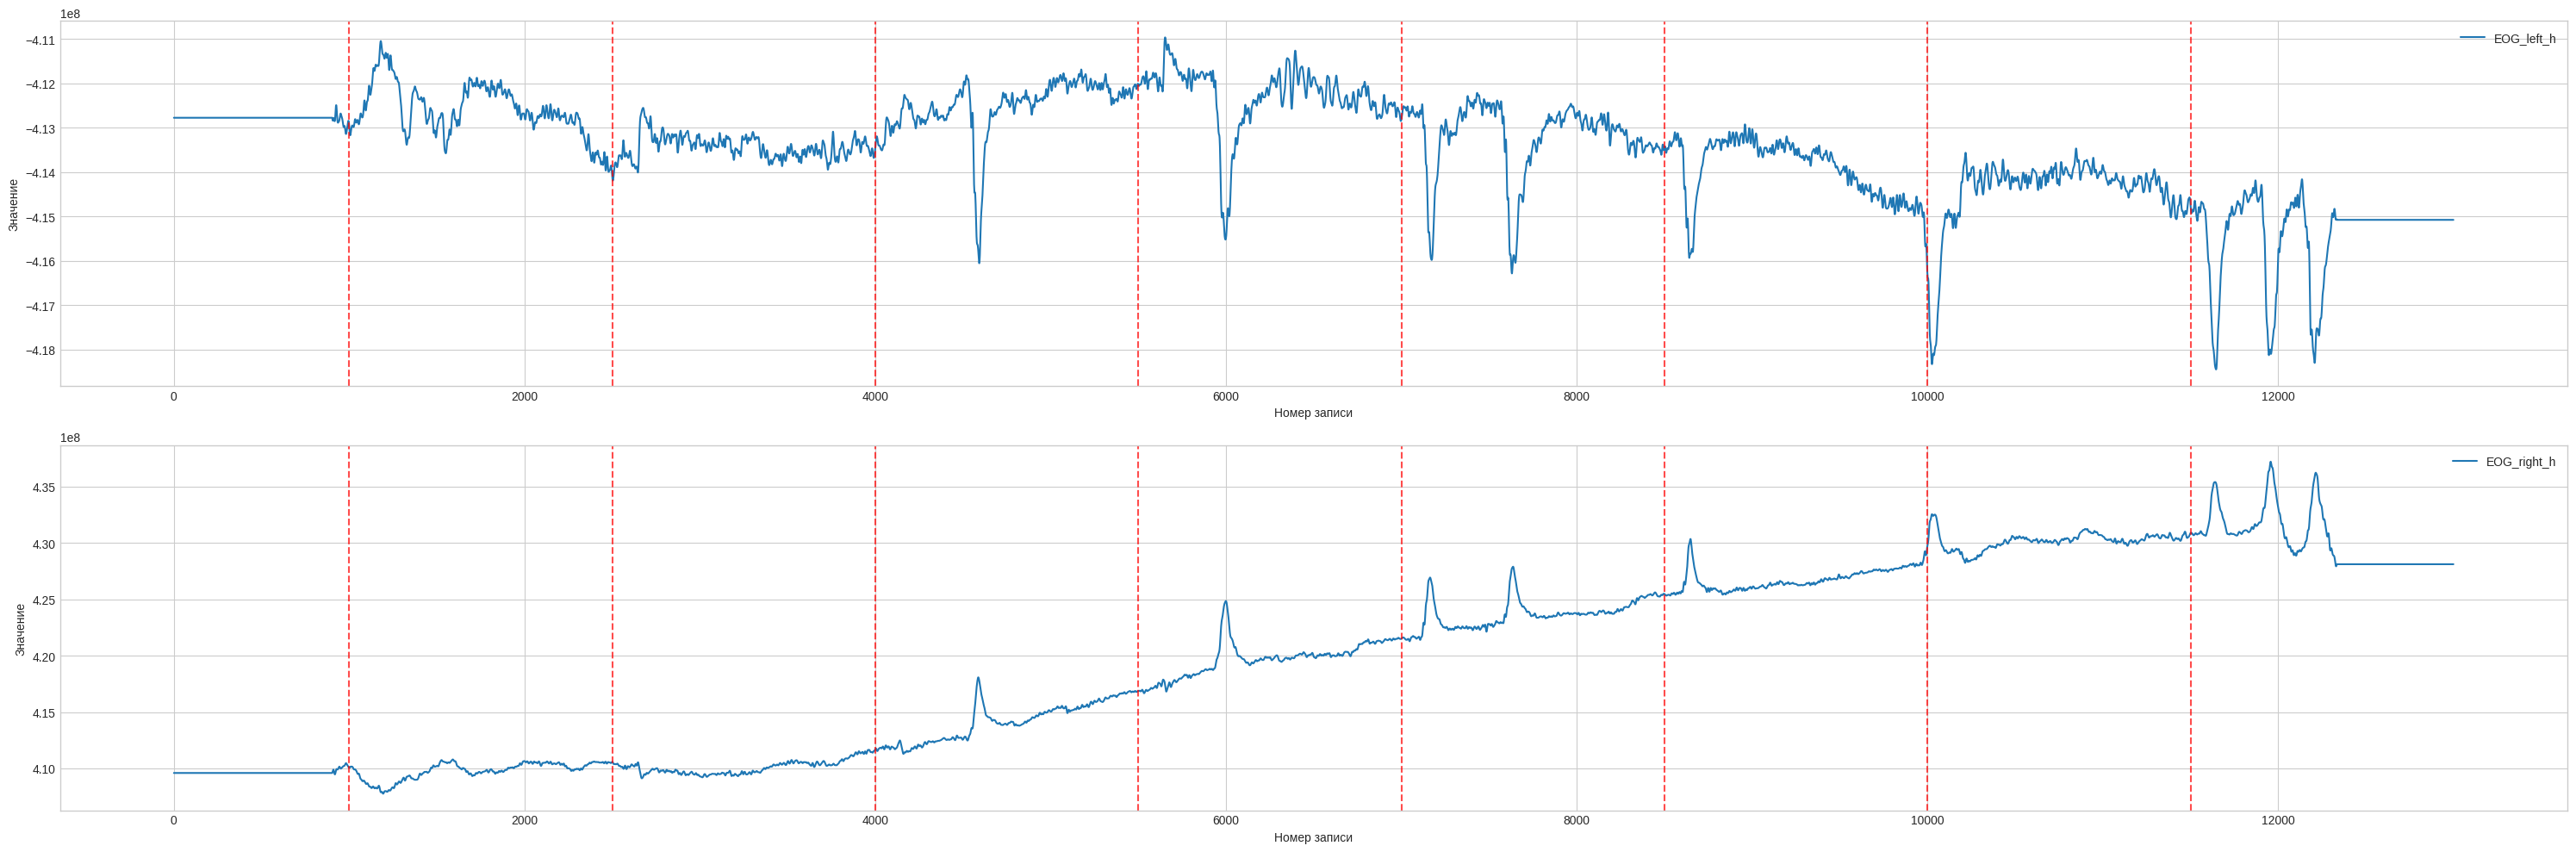

In [104]:
df = df_list_raw_ET[3]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30,10))

x_coords = [1000, 2500, 4000, 5500, 7000, 8500, 10000, 11500]

for i, column in enumerate(df.columns[1:3]):
    axes[i].plot(df.index, df[column], label=column)

    for x in x_coords:
        axes[i].axvline(x=x, color='red', linestyle='--', alpha=0.7)

    axes[i].set_xlabel('Номер записи')
    axes[i].set_ylabel('Значение')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

MIN_LAT = 10
MAX_LAT = 1000

# impulses_ms = [1000, 2500, 4000, 5500, 7000, 8500, 10000, 11500]

def _get_patient_cols(df):
    return [c for c in df.columns if str(c).startswith('patient_')]

def tidy_manlat(df, group_label):
    df2 = df.copy()
    if 'Unnamed: 0' in df2.columns:
        df2 = df2.rename(columns={'Unnamed: 0': 'saccade'})
    if 'saccade' not in df2.columns:
        df2 = df2.reset_index().rename(columns={'index': 'saccade'})

    pcols = _get_patient_cols(df2)
    long = df2.melt(id_vars=['saccade'], value_vars=pcols,
                    var_name='patient', value_name='lat')
    long['lat'] = pd.to_numeric(long['lat'], errors='coerce')
    long = long[(long['lat'] >= MIN_LAT) & (long['lat'] <= MAX_LAT)]
    long['group'] = group_label
    long['saccade'] = pd.to_numeric(long['saccade'], errors='coerce').astype('Int64')
    return long

long_PD = tidy_manlat(manlat_PD, 'PD')
long_ET = tidy_manlat(manlat_ET, 'ET')
long_all = pd.concat([long_PD, long_ET], ignore_index=True)

overall = (
    long_all
    .groupby('group')['lat']
    .agg(n='count', mean='mean', std='std', median='median', q25=lambda x: x.quantile(0.25),
         q75=lambda x: x.quantile(0.75), min='min', max='max')
    .round(3)
)
print("=== В целом по всем значениям латентностей (без усреднения по пациентам) ===")
display(overall)

per_patient = (
    long_all
    .groupby(['group', 'patient'])['lat']
    .agg(n='count', mean='mean', std='std', median='median')
    .reset_index()
)
per_patient_summary = (
    per_patient
    .groupby('group')['mean']
    .agg(n_patients='count', mean_of_means='mean', std_of_means='std',
         median_of_means='median', q25=lambda x: x.quantile(0.25), q75=lambda x: x.quantile(0.75),
         min='min', max='max')
    .round(3)
)
print("=== «Среднее по пациенту», затем сводка по группам ===")
display(per_patient_summary)

per_saccade = (
    long_all
    .groupby(['group', 'saccade'])['lat']
    .agg(n='count', mean='mean', std='std')
    .reset_index()
)
print("=== По каждой саккаде: среднее ± SD ===")
display(per_saccade.pivot(index='saccade', columns='group', values='mean').round(2))

=== В целом по всем значениям латентностей (без усреднения по пациентам) ===


,n,mean,std,median,q25,q75,min,max
group,,,,,,,,
ET,54,124.944,28.828,121.5,104.25,137.00,80.0,212.0
PD,96,127.073,41.324,126.0,98.75,149.75,40.0,225.0


=== «Среднее по пациенту», затем сводка по группам ===


,n_patients,mean_of_means,std_of_means,median_of_means,q25,q75,min,max
group,,,,,,,,
ET,9,129.332,22.356,128.875,112.571,134.600,105.857,179.333
PD,15,126.448,22.457,127.000,111.400,143.446,86.375,164.429


=== По каждой саккаде: среднее ± SD ===


group,ET,PD
saccade,,
0,156.17,161.56
1,146.25,145.73
2,122.75,142.23
3,131.75,126.58
4,104.83,117.29
5,112.00,97.30
6,108.40,112.64
7,108.17,111.00


## Графики

/tmp/ipython-input-2385727045.py:7: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



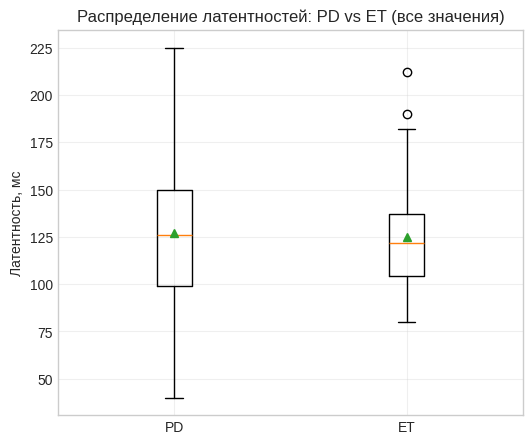

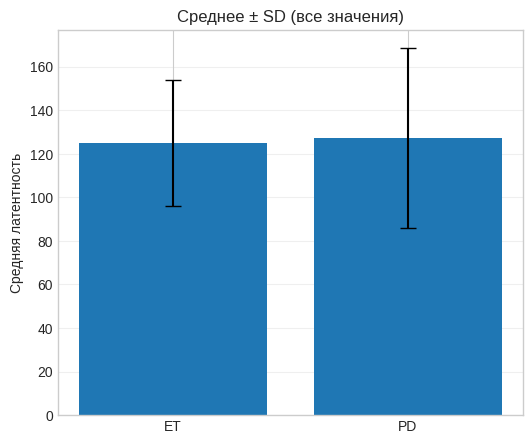

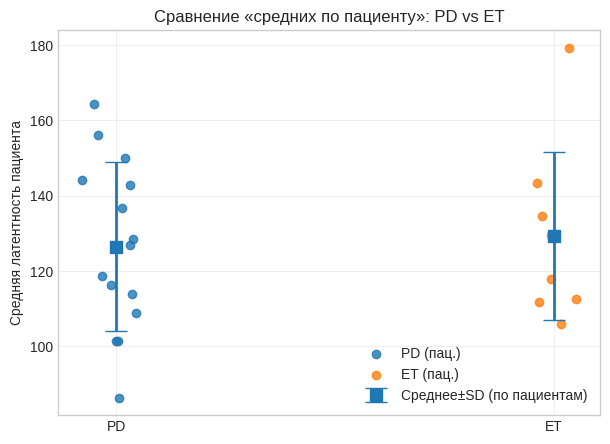

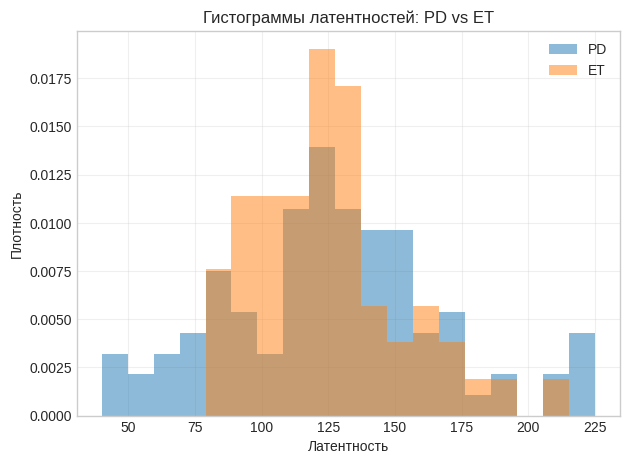

In [139]:
# A) Boxplot в целом по группам
plt.figure(figsize=(6,5))
data_PD = long_all.loc[long_all.group=='PD', 'lat'].dropna().values
data_ET = long_all.loc[long_all.group=='ET', 'lat'].dropna().values
plt.boxplot([data_PD, data_ET], labels=['PD','ET'], showmeans=True)
plt.ylabel('Латентность, мс')
plt.title('Распределение латентностей: PD vs ET (все значения)')
plt.grid(alpha=0.3)
plt.show()

# B) Столбцы: в целом среднее ± SD
plt.figure(figsize=(6,5))
bar_means = overall['mean'].values
bar_stds  = overall['std'].values
xt = np.arange(len(overall.index))
plt.bar(xt, bar_means, yerr=bar_stds, capsize=6)
plt.xticks(xt, overall.index)
plt.ylabel('Средняя латентность')
plt.title('Среднее ± SD (все значения)')
plt.grid(axis='y', alpha=0.3)
plt.show()

# C) Среднее по пациенту: точки + среднее по группе с SD
plt.figure(figsize=(7,5))
x_pos = {'PD':0, 'ET':1}
rng = np.random.default_rng(42)
for grp in ['PD','ET']:
    pts = per_patient.loc[per_patient.group==grp, 'mean'].values
    x = np.full_like(pts, x_pos[grp], dtype=float) + rng.normal(0, 0.04, size=len(pts))
    plt.scatter(x, pts, alpha=0.8, label=f'{grp} (пац.)')

# большие маркеры: среднее по пациентам ± SD
gmeans = per_patient.groupby('group')['mean'].mean()
gstds  = per_patient.groupby('group')['mean'].std()
plt.errorbar([x_pos['PD'], x_pos['ET']], [gmeans['PD'], gmeans['ET']],
             yerr=[gstds['PD'], gstds['ET']], fmt='s', ms=9, capsize=8, lw=2, label='Среднее±SD (по пациентам)')
plt.xticks([0,1], ['PD','ET'])
plt.ylabel('Средняя латентность пациента')
plt.title('Сравнение «средних по пациенту»: PD vs ET')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# E) Гистограммы распределений
plt.figure(figsize=(7,5))
bins = np.linspace(min(long_all['lat']), max(long_all['lat']), 20)
plt.hist(data_PD, bins=bins, alpha=0.5, label='PD', density=True)
plt.hist(data_ET, bins=bins, alpha=0.5, label='ET', density=True)
plt.xlabel('Латентность')
plt.ylabel('Плотность')
plt.title('Гистограммы латентностей: PD vs ET')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


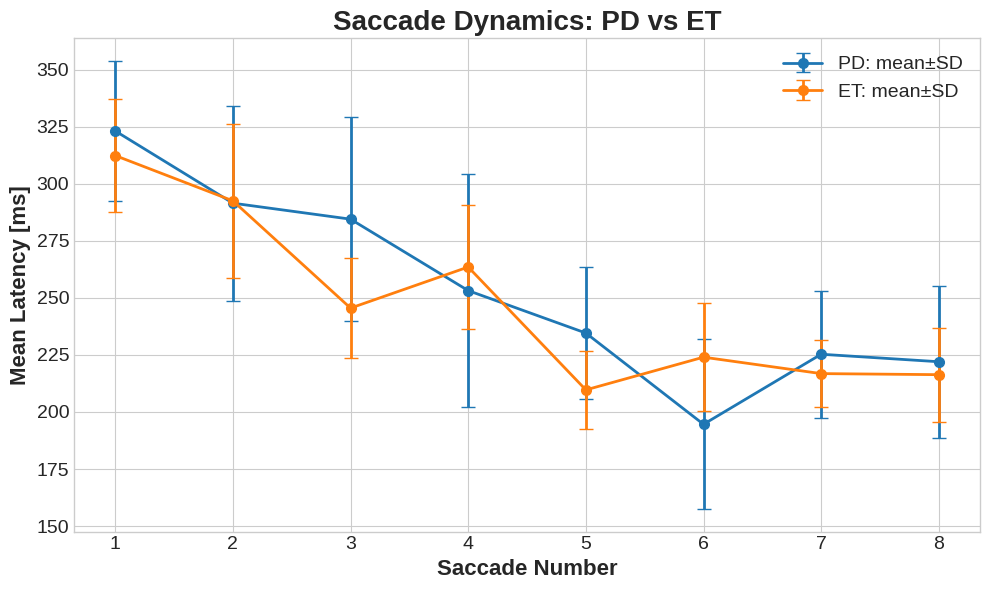

In [137]:
# D) По саккадам: линия среднего ± SD для PD и ET
fig, ax = plt.subplots(figsize=(10, 6))

for grp, color_idx in [('PD', 0), ('ET', 1)]:
    dfg = per_saccade[per_saccade.group == grp].sort_values('saccade')
    x = dfg['saccade'].astype(int).values + 1
    y = dfg['mean'].values * 2
    e = dfg['std'].values
    ax.errorbar(
        x, y, yerr=e,
        marker='o',
        capsize=5,
        linewidth=2,
        markersize=7,
        label=f'{grp}: mean±SD'
    )

# ax.set_xticks(x)
# ax.set_xticklabels(impulses_ms, fontsize=12)

ax.set_xlabel('Saccade Number', fontsize=16, fontweight='bold')
ax.set_ylabel('Mean Latency [ms]', fontsize=16, fontweight='bold')
ax.set_title('Saccade Dynamics: PD vs ET', fontsize=20, fontweight='bold')

ax.tick_params(axis='both', labelsize=14)
ax.grid(True)

legend = ax.legend(fontsize=14)
fig.tight_layout()
plt.show()


In [107]:
import numpy as np
import pandas as pd
from scipy import stats
from IPython.display import display

MIN_LAT, MAX_LAT = 10, 1000  # мс

def tidy_manlat(df, group_label):
    df2 = df.copy()
    if 'Unnamed: 0' in df2.columns:
        df2 = df2.rename(columns={'Unnamed: 0': 'saccade'})
    if 'saccade' not in df2.columns:
        df2 = df2.reset_index().rename(columns={'index': 'saccade'})
    pcols = [c for c in df2.columns if str(c).startswith('patient_')]
    long = df2.melt(id_vars=['saccade'], value_vars=pcols,
                    var_name='patient', value_name='lat')
    long['lat'] = pd.to_numeric(long['lat'], errors='coerce')
    long = long[(long['lat'] >= MIN_LAT) & (long['lat'] <= MAX_LAT)]
    long['group'] = group_label
    return long

long_PD = tidy_manlat(manlat_PD, 'PD')
long_ET = tidy_manlat(manlat_ET, 'ET')
long_all = pd.concat([long_PD, long_ET], ignore_index=True)

x_all = long_PD['lat'].dropna().to_numpy()
y_all = long_ET['lat'].dropna().to_numpy()

mw_all = stats.mannwhitneyu(x_all, y_all, alternative='two-sided')
bm_all = stats.brunnermunzel(x_all, y_all, alternative='two-sided', distribution='t')

res_all = pd.DataFrame([{
    'label': 'Все значения',
    'n_PD': len(x_all), 'n_ET': len(y_all),
    'MW_U': float(mw_all.statistic), 'MW_p': float(mw_all.pvalue),
    'BM_stat': float(bm_all.statistic), 'BM_p': float(bm_all.pvalue),
}])

per_patient = (
    long_all.groupby(['group','patient'])['lat']
    .mean().reset_index(name='mean_lat')
)
x_pp = per_patient.loc[per_patient.group=='PD','mean_lat'].dropna().to_numpy()
y_pp = per_patient.loc[per_patient.group=='ET','mean_lat'].dropna().to_numpy()

mw_pp = stats.mannwhitneyu(x_pp, y_pp, alternative='two-sided')
bm_pp = stats.brunnermunzel(x_pp, y_pp, alternative='two-sided', distribution='t')

res_pp = pd.DataFrame([{
    'label': 'Среднее по пациенту',
    'n_PD': len(x_pp), 'n_ET': len(y_pp),
    'MW_U': float(mw_pp.statistic), 'MW_p': float(mw_pp.pvalue),
    'BM_stat': float(bm_pp.statistic), 'BM_p': float(bm_pp.pvalue),
}])

print('(а) Все наблюдения:')
display(res_all)
print('\n(б) Среднее по пациенту:')
display(res_pp)


(а) Все наблюдения:


,label,n_PD,n_ET,MW_U,MW_p,BM_stat,BM_p
0,Все значения,96,54,2714.0,0.634235,-0.495695,0.620869



(б) Среднее по пациенту:


,label,n_PD,n_ET,MW_U,MW_p,BM_stat,BM_p
0,Среднее по пациенту,15,9,65.0,0.905072,0.147819,0.883908


In [132]:
impulses_ms = [1000, 2500, 4000, 5500, 7000, 8500, 10000, 11500]

def _get_raw_lists():
    """Аккуратно достаём списки сырых датафреймов из окружения."""
    try:
        raw_ET = df_list_raw_ET
    except NameError:
        raw_ET = df_list_raw
    try:
        raw_PD = df_list_raw_PD
    except NameError:
        raw_PD = df_list_raw
    return raw_ET, raw_PD

def _interp_at(x, y, t):
    """Значение сигнала y(x) в момент t по линейной интерполяции."""
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    t = float(t)
    return float(np.interp(t, x, y))

import matplotlib.pyplot as plt

def plot_patient_raw_with_saccades(
    group: str,
    patient_idx: int,
    manual_df: pd.DataFrame,
    raw_df: pd.DataFrame,
    impulses=impulses_ms,
    channel='EOG_right_v',
    point_color='black'
):

    scale_x = 2.0
    plt.style.use('seaborn-v0_8-whitegrid')

    a_col = f'{group}_{patient_idx}_a'
    b_col = f'{group}_{patient_idx}_b'
    if a_col not in manual_df.columns or b_col not in manual_df.columns:
        raise ValueError(f"manual_{group} has no columns {a_col}/{b_col}")

    if np.issubdtype(raw_df.index.dtype, np.number):
        t_raw = raw_df.index.to_numpy(dtype=float)
    elif 'time' in raw_df.columns:
        t_raw = pd.to_numeric(raw_df['time'], errors='coerce').to_numpy()
    else:
        t_raw = pd.to_numeric(raw_df.index, errors='coerce').to_numpy()

    if channel not in raw_df.columns:
        raise ValueError(f"raw_df has no column {channel}")
    y = pd.to_numeric(raw_df[channel], errors='coerce').to_numpy()
    t_plot = t_raw * scale_x

    fig, ax = plt.subplots(figsize=(16, 8))
    ax.plot(t_plot, y, lw=1.8, label=None)

    impulses_raw = [float(x) for x in impulses]
    stim_x_plot_list = []
    for x_imp_raw in impulses_raw:
        x_imp_plot = x_imp_raw * scale_x
        stim_x_plot_list.append(x_imp_plot)
        ax.axvline(x_imp_plot, linestyle='--', alpha=0.6, label=None)






#///


    x_min_vis, x_max_vis = 3500, 7000
    ax.set_xlim(x_min_vis, x_max_vis)

    ab = manual_df[[a_col, b_col]].to_numpy(dtype=float)
    n_pairs = min(len(impulses_raw), len(ab))

    for k in range(n_pairs):
        x_imp_raw = impulses_raw[k]
        a_manual_raw, b_manual_raw = ab[k]

        if not np.isfinite(a_manual_raw):
            continue

        t_b_raw = float(a_manual_raw)
        t_a_raw = float(x_imp_raw)

        t_a_plot = t_a_raw * scale_x
        t_b_plot = t_b_raw * scale_x

        left_plot = min(t_a_plot, t_b_plot)
        right_plot = max(t_a_plot, t_b_plot)

        if right_plot < x_min_vis or left_plot > x_max_vis:
            continue

        ax.axvspan(left_plot, right_plot, alpha=0.20)
        y_a = _interp_at(t_raw, y, t_a_raw)
        y_b = _interp_at(t_raw, y, t_b_raw)

        ax.scatter([t_a_plot, t_b_plot], [y_a, y_b], s=70, zorder=5, color=point_color)

        ax.annotate(
            '',
            (t_a_plot, y_a),
            xytext=(5, 8),
            textcoords='offset points',
            fontsize=14
        )
        ax.annotate(
            '',
            (t_b_plot, y_b),
            xytext=(5, -16),
            textcoords='offset points',
            fontsize=14
        )

        y_min, y_max = ax.get_ylim()
        y_arrow = y_max - 0.1 * (y_max - y_min)

        ax.annotate(
            '',
            xy=(right_plot, y_arrow),
            xytext=(left_plot, y_arrow),
            arrowprops=dict(arrowstyle='<->', linewidth=4.5),
            zorder=6,
            annotation_clip=True
        )

        ax.text(
            (left_plot + right_plot) / 2,
            y_arrow + 0.02 * (y_max - y_min),
            'Latency',
            ha='center',
            va='bottom',
            fontsize=20,
            clip_on=True
        )

    stim_x_visible = [x for x in stim_x_plot_list if x_min_vis <= x <= x_max_vis]
    if stim_x_visible:
        stim_x = min(stim_x_visible)
        y_min, y_max = ax.get_ylim()
        y_stim = y_max - 0.2 * (y_max - y_min)

        width = x_max_vis - x_min_vis
        arrow_len = 0.07 * width
        x_start = max(x_min_vis + 0.02 * width, stim_x - arrow_len)

        ax.annotate(
            'The jump in the visual stimulus',
            xy=(stim_x, y_stim),
            xytext=(x_start, y_stim),
            arrowprops=dict(arrowstyle='->', linewidth=4.5),
            ha='right',
            va='center',
            fontsize=20,
            annotation_clip=True
        )

    ax.set_title(f'{group}: patient {patient_idx} (right eye, vertical)',
                 fontsize=25, fontweight='bold')
    ax.set_xlabel('Time [ms]', fontsize=17)
    ax.set_ylabel('Amplitude [degrees]', fontsize=17)

    ax.spines['bottom'].set_linewidth(1.8)
    ax.spines['left'].set_linewidth(1.8)

    ax.tick_params(axis='both', labelsize=15)
    ax.grid(True, alpha=1)

    plt.tight_layout()
    plt.show()


In [109]:
"""# ---------------- Примеры вызова ----------------
raw_ET_list, raw_PD_list = _get_raw_lists()

for i in range(10):
  plot_patient_raw_with_saccades(
      group='ET',
      patient_idx=i,
      manual_df=manual_ET,
      raw_df=raw_ET_list[i],
      impulses=impulses_ms,
      channel='EOG_right_v'
  )"""


"# ---------------- Примеры вызова ----------------\nraw_ET_list, raw_PD_list = _get_raw_lists()\n\nfor i in range(10):\n  plot_patient_raw_with_saccades(\n      group='ET',\n      patient_idx=i,\n      manual_df=manual_ET,\n      raw_df=raw_ET_list[i],\n      impulses=impulses_ms,\n      channel='EOG_right_v'\n  )"

In [131]:
df_list_raw_PD[10]

,time,EOG_left_h,EOG_right_h,EOG_left_v,EOG_right_v,head_horizontal,head_frontal,head_sagittal,Сигнал_8,Сигнал_9,Сигнал_10,Сигнал_11
0,0,1.707815,-0.192552,-0.170840,2.214127,0.000000,0.000000,0.000000,NaN,NaN,0.0,0.0
1,1,1.689449,-0.171777,-0.168528,2.191292,0.000000,0.000000,0.000000,NaN,NaN,0.0,0.0
2,2,1.671168,-0.151176,-0.166241,2.168539,0.000000,0.000000,0.000000,NaN,NaN,0.0,0.0
3,3,1.652972,-0.130749,-0.163978,2.145869,0.000000,0.000000,0.000000,NaN,NaN,0.0,0.0
4,4,1.634860,-0.110494,-0.161738,2.123281,0.000000,0.000000,0.000000,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12995,12995,2.466616,1.376984,-0.182723,1.321413,-0.076295,-0.488289,0.549325,NaN,NaN,NaN,NaN
12996,12996,2.494922,1.378467,-0.191132,1.321783,-0.076295,-0.488289,0.549325,NaN,NaN,NaN,NaN
12997,12997,2.523375,1.379861,-0.199604,1.322116,-0.076295,-0.488289,0.549325,NaN,NaN,NaN,NaN
12998,12998,2.551976,1.381168,-0.208139,1.322410,-0.076295,-0.488289,0.549325,NaN,NaN,NaN,NaN


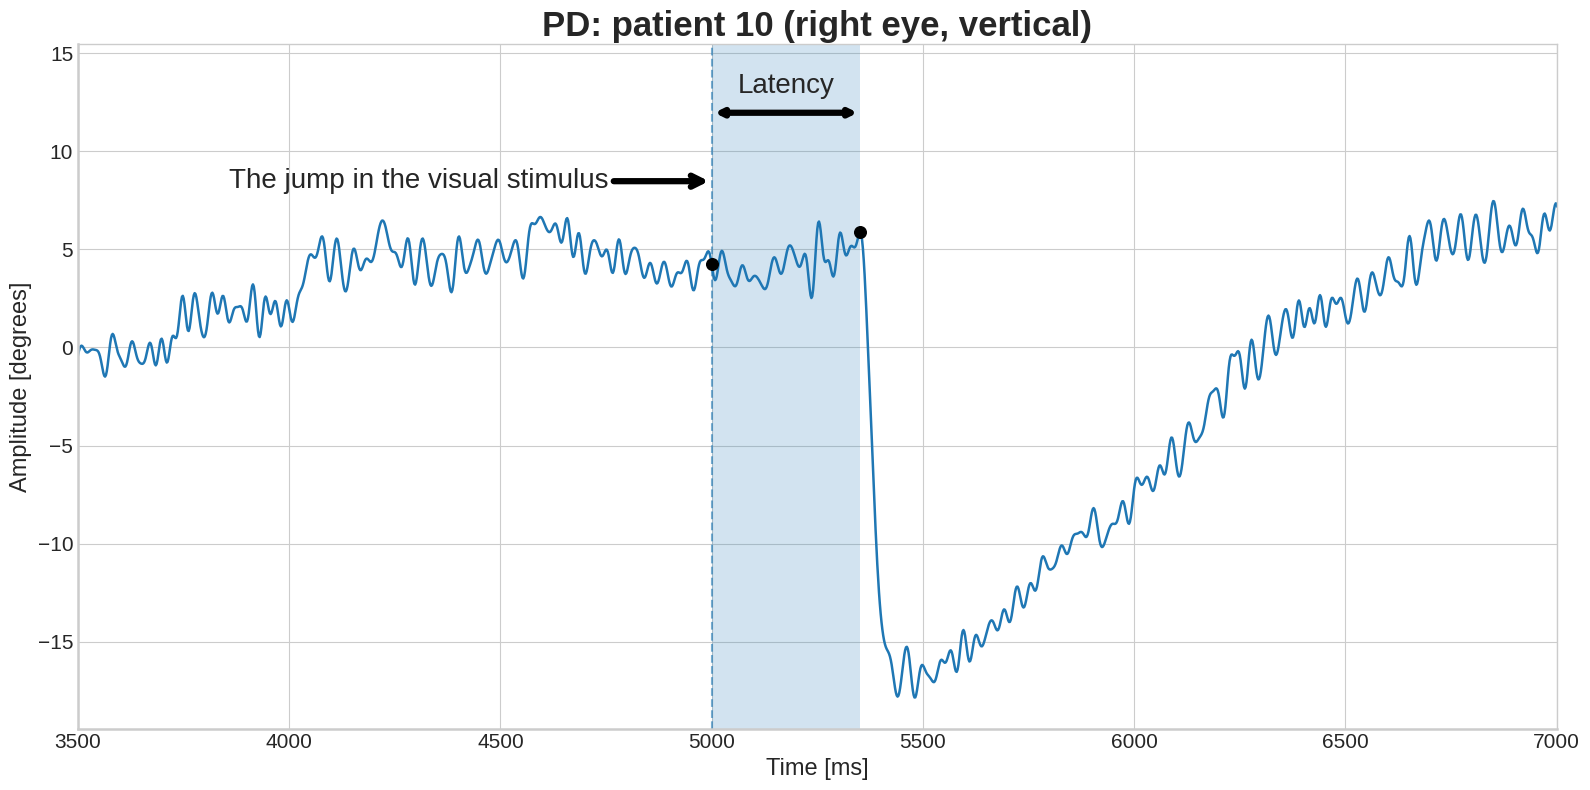

In [133]:
#for i in range(17):
for i in range(10,11):
  plot_patient_raw_with_saccades(
      group='PD',
      patient_idx=i,
      manual_df=manual_PD,
      raw_df=df_list_raw_PD[i],
      impulses=impulses_ms,
      channel='EOG_right_v'
  )